In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats

TrainingData = pd.read_pickle('TrData_7iters_vanilla.pkl')
ValidationData = pd.read_pickle('VlData_7iters_vanilla.pkl')
TestData = pd.read_pickle('TsData_7iters_vanilla.pkl')

print('no-dropout section of data reading completed')

# With dropout applied
dTrainingData = pd.read_pickle('TrData_7iters_d30.pkl')
dValidationData = pd.read_pickle('VlData_7iters_d30.pkl')
dTestData = pd.read_pickle('TsData_7iters_d30.pkl')
"""
dTrainingData = pd.read_pickle('TrData_7iters_d20.pkl')
dValidationData = pd.read_pickle('VlData_7iters_d20.pkl')
dTestData = pd.read_pickle('TsData_7iters_d20.pkl')
"""

print('dropout section of data reading completed')


no-dropout section of data reading completed
dropout section of data reading completed


In [20]:
TrainingMean = TrainingData['predicted_value'].mean(axis=1)
TrainingSTD  = TrainingData['predicted_value'].std(axis=1)
TestMean     = TestData['predicted_value'].mean(axis=1)
TestSTD      = TestData['predicted_value'].std(axis=1)

TrainingStats = pd.concat([TrainingMean, TrainingSTD], axis=1)
TestStats     = pd.concat([TestMean, TestSTD], axis=1)
TrainingStats.columns = ['mean', 'std']
TestStats.columns     = ['mean', 'std']

ValidationMean  = ValidationData['predicted_value'] # .mean(axis=1)
ValidationSTD   = ValidationData['predicted_value'] * 0 # ValidationData['predicted_value'].std(axis=1)
ValidationStats = pd.concat([ValidationMean, ValidationSTD], axis=1)
ValidationStats.columns = ['mean', 'std']


In [21]:
"""
TestMean     = TestData['predicted_value'].iloc[:,4]
TestSTD      = TestMean * 0
TestStats    = pd.concat([TestMean, TestSTD], axis=1)
TestStats.columns     = ['mean', 'std']
"""


"\nTestMean     = TestData['predicted_value'].iloc[:,4]\nTestSTD      = TestMean * 0\nTestStats    = pd.concat([TestMean, TestSTD], axis=1)\nTestStats.columns     = ['mean', 'std']\n"

In [22]:
dTrainingMean = dTrainingData['predicted_value'].mean(axis=1)
dTrainingSTD  = dTrainingData['predicted_value'].std(axis=1)
dTestMean     = dTestData['predicted_value'].mean(axis=1)
dTestSTD      = dTestData['predicted_value'].std(axis=1)

dTrainingStats = pd.concat([dTrainingMean, dTrainingSTD], axis=1)
dTestStats     = pd.concat([dTestMean, dTestSTD], axis=1)
dTrainingStats.columns = ['mean', 'std']
dTestStats.columns     = ['mean', 'std']

dValidationMean  = dValidationData['predicted_value'].mean(axis=1)
dValidationSTD   = dValidationData['predicted_value'].std(axis=1)
dValidationStats = pd.concat([dValidationMean, dValidationSTD], axis=1)
dValidationStats.columns = ['mean', 'std']


Note: If the linear regression line of the means of the predictions don't align with the parity line, then the learning usually hasn't converged. 

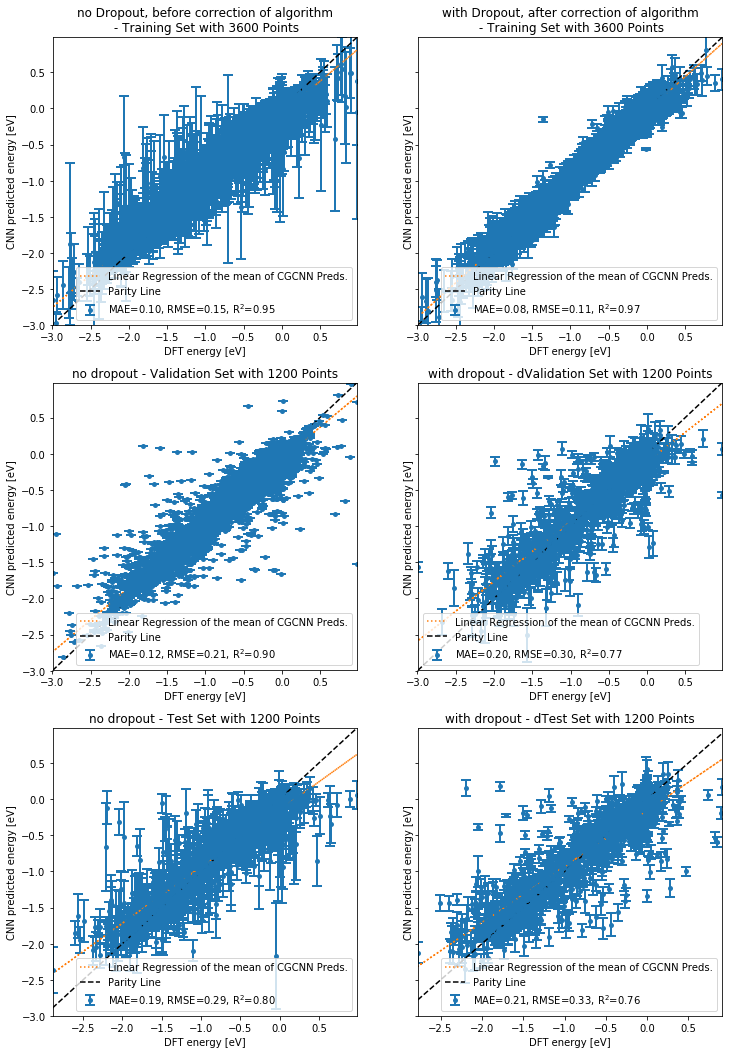

In [23]:
trslope, trintercept, trr_value, trp_value, trstd_err = stats.linregress(TrainingData.iloc[:, 0],
                                                                         TrainingStats['mean'])
tsslope, tsintercept, tsr_value, tsp_value, tsstd_err = stats.linregress(TestData.iloc[:, 0],
                                                                         TestStats['mean'])
vlslope, vlintercept, vlr_value, vlp_value, vlstd_err = stats.linregress(ValidationData.iloc[:, 0],
                                                                         ValidationStats['mean'])
dtrslope, dtrintercept, dtrr_value, dtrp_value, dtrstd_err = stats.linregress(dTrainingData.iloc[:, 0],
                                                                              dTrainingStats['mean'])
dtsslope, dtsintercept, dtsr_value, dtsp_value, dtsstd_err = stats.linregress(dTestData.iloc[:, 0],
                                                                              dTestStats['mean'])
dvlslope, dvlintercept, dvlr_value, dvlp_value, dvlstd_err = stats.linregress(dValidationData.iloc[:, 0],
                                                                              dValidationStats['mean'])

f, axs2 = plt.subplots(3, 2, figsize=(12, 18), sharey=True)
ax2a, ax2d, ax2c, ax2f, ax2b, ax2e  = axs2.flatten()

trainmean = TrainingData.iloc[:, 0]
testmean = TestData.iloc[:, 0]
Validationmean = ValidationData.iloc[:, 0]
dtrainmean = TrainingData.iloc[:, 0]
dtestmean = dTestData.iloc[:, 0]
dValidationmean = dValidationData.iloc[:, 0]

ax2a.errorbar(TrainingData.iloc[:, 0], TrainingStats['mean'],
             yerr=TrainingStats['std'],
             # lolims=True, uplims=True,
             capsize=5, elinewidth=2, markeredgewidth=2,
             linestyle='', marker='.',
             label='MAE=%0.2f, RMSE=%0.2f, R$^2$=%0.2f'\
             %(mean_absolute_error(TrainingData.iloc[:, 0], TrainingStats['mean']), 
               np.sqrt(mean_squared_error(TrainingData.iloc[:, 0], TrainingStats['mean'])),
               r2_score(TrainingData.iloc[:, 0], TrainingStats['mean'])))

ax2a.plot(TrainingData.iloc[:, 0], TrainingData.iloc[:, 0]*trslope+trintercept, linestyle=':',
         label='Linear Regression of the mean of CGCNN Preds.')

ax2a.plot([min(trainmean), max(trainmean)], 
         [min(trainmean), max(trainmean)], 'k--', label='Parity Line')

ax2a.set_xlabel('DFT energy [eV]')
ax2a.set_ylabel('CNN predicted energy [eV]')
ax2a.set_title('no Dropout, before correction of algorithm\n - Training Set with 3600 Points')
ax2a.set_xlim((min(trainmean), max(trainmean)))
ax2a.set_ylim((min(trainmean), max(trainmean)))
ax2a.legend()

ax2b.errorbar(TestData.iloc[:, 0], TestStats['mean'],
             yerr=TestStats['std'],
             # lolims=True, uplims=True,
             capsize=5, elinewidth=2, markeredgewidth=2,
             linestyle='', marker='.',
             label='MAE=%0.2f, RMSE=%0.2f, R$^2$=%0.2f'\
             %(mean_absolute_error(TestData.iloc[:, 0], TestStats['mean']), 
               np.sqrt(mean_squared_error(TestData.iloc[:, 0], TestStats['mean'])),
               r2_score(TestData.iloc[:, 0], TestStats['mean'])))
ax2b.plot(TestData.iloc[:, 0], TestData.iloc[:, 0]*tsslope+tsintercept, linestyle=':',
         label='Linear Regression of the mean of CGCNN Preds.')
ax2b.plot([min(testmean), max(testmean)], 
         [min(testmean), max(testmean)], 'k--', label='Parity Line')

ax2b.set_xlabel('DFT energy [eV]')
ax2b.set_ylabel('CNN predicted energy [eV]')
ax2b.set_title('no dropout - Test Set with 1200 Points')
ax2b.set_xlim((min(testmean), max(testmean)))
ax2b.set_ylim((min(testmean), max(testmean)))
ax2b.legend()

ax2c.errorbar(ValidationData.iloc[:, 0], ValidationStats['mean'],
             yerr=ValidationStats['std'],
             # lolims=True, uplims=True,
             capsize=5, elinewidth=2, markeredgewidth=2,
             linestyle='', marker='.',
             label='MAE=%0.2f, RMSE=%0.2f, R$^2$=%0.2f'\
             %(mean_absolute_error(ValidationData.iloc[:, 0], ValidationStats['mean']), 
               np.sqrt(mean_squared_error(ValidationData.iloc[:, 0], ValidationStats['mean'])),
               r2_score(ValidationData.iloc[:, 0], ValidationStats['mean'])))
ax2c.plot(ValidationData.iloc[:, 0], ValidationData.iloc[:, 0]*vlslope+vlintercept, linestyle=':',
         label='Linear Regression of the mean of CGCNN Preds.')
ax2c.plot([min(Validationmean), max(Validationmean)], 
         [min(Validationmean), max(Validationmean)], 'k--', label='Parity Line')

ax2c.set_xlabel('DFT energy [eV]')
ax2c.set_ylabel('CNN predicted energy [eV]')
ax2c.set_title('no dropout - Validation Set with 1200 Points')
ax2c.set_xlim((min(Validationmean), max(Validationmean)))
ax2c.set_ylim((min(Validationmean), max(Validationmean)))
ax2c.legend()

ax2d.errorbar(dTrainingData.iloc[:, 0], dTrainingStats['mean'],
             yerr=dTrainingStats['std'],
             # lolims=True, uplims=True,
             capsize=5, elinewidth=2, markeredgewidth=2,
             linestyle='', marker='.',
             label='MAE=%0.2f, RMSE=%0.2f, R$^2$=%0.2f'\
             %(mean_absolute_error(dTrainingData.iloc[:, 0], dTrainingStats['mean']), 
               np.sqrt(mean_squared_error(dTrainingData.iloc[:, 0], dTrainingStats['mean'])),
               r2_score(dTrainingData.iloc[:, 0], dTrainingStats['mean'])))

ax2d.plot(dTrainingData.iloc[:, 0], dTrainingData.iloc[:, 0]*dtrslope+dtrintercept, linestyle=':',
         label='Linear Regression of the mean of CGCNN Preds.')
         
ax2d.plot([min(dtrainmean), max(dtrainmean)], 
         [min(dtrainmean), max(dtrainmean)], 'k--', label='Parity Line')

ax2d.set_xlabel('DFT energy [eV]')
ax2d.set_ylabel('CNN predicted energy [eV]')
ax2d.set_title('with Dropout, after correction of algorithm\n - Training Set with 3600 Points')
ax2d.set_xlim((min(dtrainmean), max(dtrainmean)))
ax2d.set_ylim((min(dtrainmean), max(dtrainmean)))
ax2d.legend()

ax2e.errorbar(dTestData.iloc[:, 0], dTestStats['mean'],
             yerr=dTestStats['std'],
             # lolims=True, uplims=True,
             capsize=5, elinewidth=2, markeredgewidth=2,
             linestyle='', marker='.',
             label='MAE=%0.2f, RMSE=%0.2f, R$^2$=%0.2f'\
             %(mean_absolute_error(dTestData.iloc[:, 0], dTestStats['mean']), 
               np.sqrt(mean_squared_error(dTestData.iloc[:, 0], dTestStats['mean'])),
               r2_score(dTestData.iloc[:, 0], dTestStats['mean'])))
ax2e.plot(dTestData.iloc[:, 0], dTestData.iloc[:, 0]*dtsslope+dtsintercept, linestyle=':',
         label='Linear Regression of the mean of CGCNN Preds.')
ax2e.plot([min(dtestmean), max(dtestmean)], 
         [min(dtestmean), max(dtestmean)], 'k--', label='Parity Line')

ax2e.set_xlabel('DFT energy [eV]')
ax2e.set_ylabel('CNN predicted energy [eV]')
ax2e.set_title('with dropout - dTest Set with 1200 Points')
ax2e.set_xlim((min(dtestmean), max(dtestmean)))
ax2e.set_ylim((min(dtestmean), max(dtestmean)))
ax2e.legend()

ax2f.errorbar(dValidationData.iloc[:, 0], dValidationStats['mean'],
             yerr=dValidationStats['std'],
             # lolims=True, uplims=True,
             capsize=5, elinewidth=2, markeredgewidth=2,
             linestyle='', marker='.',
             label='MAE=%0.2f, RMSE=%0.2f, R$^2$=%0.2f'\
             %(mean_absolute_error(dValidationData.iloc[:, 0], dValidationStats['mean']), 
               np.sqrt(mean_squared_error(dValidationData.iloc[:, 0], dValidationStats['mean'])),
               r2_score(dValidationData.iloc[:, 0], dValidationStats['mean'])))
ax2f.plot(dValidationData.iloc[:, 0], dValidationData.iloc[:, 0]*dvlslope+dvlintercept, linestyle=':',
         label='Linear Regression of the mean of CGCNN Preds.')
ax2f.plot([min(dValidationmean), max(dValidationmean)], 
         [min(dValidationmean), max(dValidationmean)], 'k--', label='Parity Line')

ax2f.set_xlabel('DFT energy [eV]')
ax2f.set_ylabel('CNN predicted energy [eV]')
ax2f.set_title('with dropout - dValidation Set with 1200 Points')
ax2f.set_xlim((min(dValidationmean), max(dValidationmean)))
ax2f.set_ylim((min(dValidationmean), max(dValidationmean)))
ax2f.legend()

plt.show()

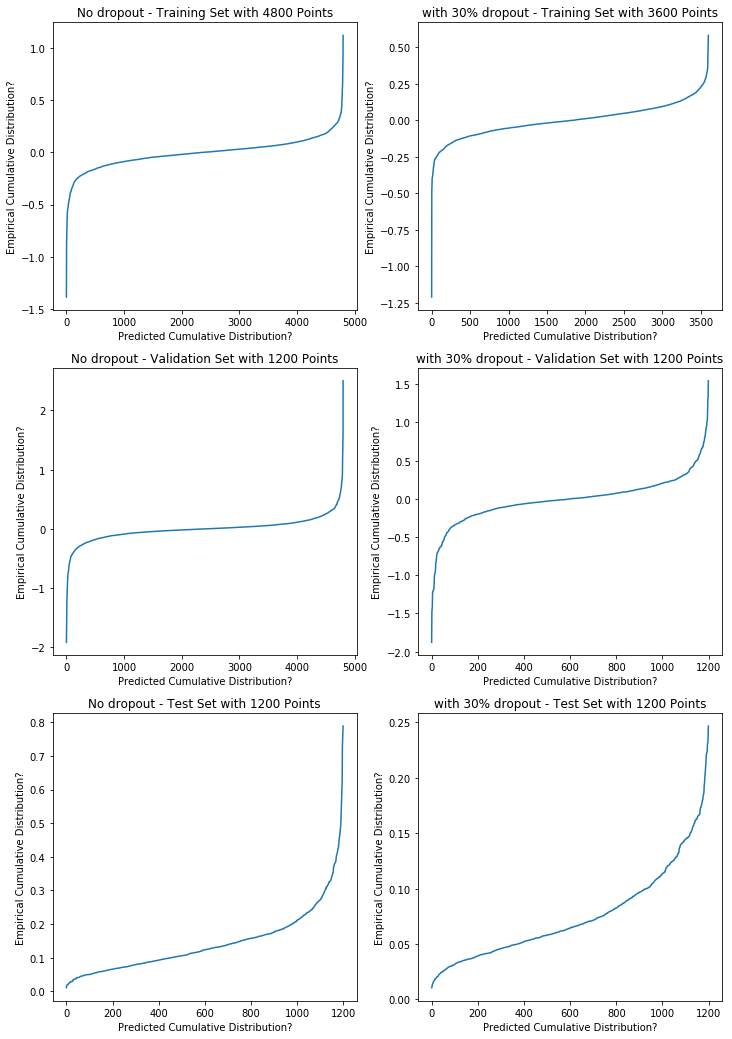

In [24]:
f, ax3s = plt.subplots(3, 2, figsize=(12, 18)) # , sharey=True)
ax3a, ax3d, ax3b, ax3e, ax3c, ax3f = ax3s.flatten()

predicted_pi = list(range(TrainingStats['std'].size))
observed_pi  = (TrainingData.iloc[:, 0] - TrainingStats['mean']).sort_values()
ax3a.plot(predicted_pi, observed_pi)
ax3a.set_xlabel('Predicted Cumulative Distribution?')
ax3a.set_ylabel('Empirical Cumulative Distribution?')
ax3a.set_title('No dropout - Training Set with 4800 Points')

predicted_pi = list(range(ValidationStats['std'].size))
observed_pi  = (ValidationData.iloc[:, 0] - ValidationStats['mean']).sort_values()
ax3b.plot(predicted_pi, observed_pi)
ax3b.set_xlabel('Predicted Cumulative Distribution?')
ax3b.set_ylabel('Empirical Cumulative Distribution?')
ax3b.set_title('No dropout - Validation Set with 1200 Points')

predicted_pi = list(range(TestStats['std'].size))
observed_pi  = TestStats['std'].sort_values()
ax3c.plot(predicted_pi, observed_pi)
ax3c.set_xlabel('Predicted Cumulative Distribution?')
ax3c.set_ylabel('Empirical Cumulative Distribution?')
ax3c.set_title('No dropout - Test Set with 1200 Points')

predicted_pi = list(range(dTrainingStats['std'].size))
observed_pi  = (dTrainingData.iloc[:, 0] - dTrainingStats['mean']).sort_values()
ax3d.plot(predicted_pi, observed_pi)
ax3d.set_xlabel('Predicted Cumulative Distribution?')
ax3d.set_ylabel('Empirical Cumulative Distribution?')
ax3d.set_title('with 30% dropout - Training Set with 3600 Points')

predicted_pi = list(range(dValidationStats['std'].size))
observed_pi  = (dValidationData.iloc[:, 0] - dValidationStats['mean']).sort_values()
ax3e.plot(predicted_pi, observed_pi)
ax3e.set_xlabel('Predicted Cumulative Distribution?')
ax3e.set_ylabel('Empirical Cumulative Distribution?')
ax3e.set_title('with 30% dropout - Validation Set with 1200 Points')

predicted_pi = list(range(dTestStats['std'].size))
observed_pi  = dTestStats['std'].sort_values()
ax3f.plot(predicted_pi, observed_pi)
ax3f.set_xlabel('Predicted Cumulative Distribution?')
ax3f.set_ylabel('Empirical Cumulative Distribution?')
ax3f.set_title('with 30% dropout - Test Set with 1200 Points')

plt.show()

In [48]:
(TrainingData.iloc[:, 0] - TrainingStats['mean']).sort_values()

2832   -1.387409
2816   -0.996386
3171   -0.889497
343    -0.870932
4239   -0.839853
960    -0.772162
1369   -0.724922
2261   -0.708742
2087   -0.702283
3544   -0.674580
842    -0.674454
2246   -0.653720
216    -0.642161
198    -0.620076
3041   -0.615323
1006   -0.593793
3188   -0.583798
3167   -0.575113
3636   -0.573224
2239   -0.564089
1673   -0.558940
1167   -0.550533
3937   -0.546627
1018   -0.546107
2874   -0.543935
698    -0.537432
2846   -0.528883
446    -0.527405
175    -0.524826
208    -0.524368
          ...   
1658    0.413870
1650    0.414783
2317    0.422225
1892    0.433044
2744    0.435259
3665    0.439441
2554    0.446323
3856    0.480695
1924    0.502427
720     0.502673
1836    0.515048
1274    0.546776
3480    0.547418
979     0.549685
3762    0.551386
2962    0.595489
1662    0.609990
3621    0.618362
4241    0.622830
3872    0.628258
3795    0.655463
2749    0.711864
360     0.743809
2557    0.829326
2081    0.829977
3487    0.832625
804     0.855259
2031    0.9055

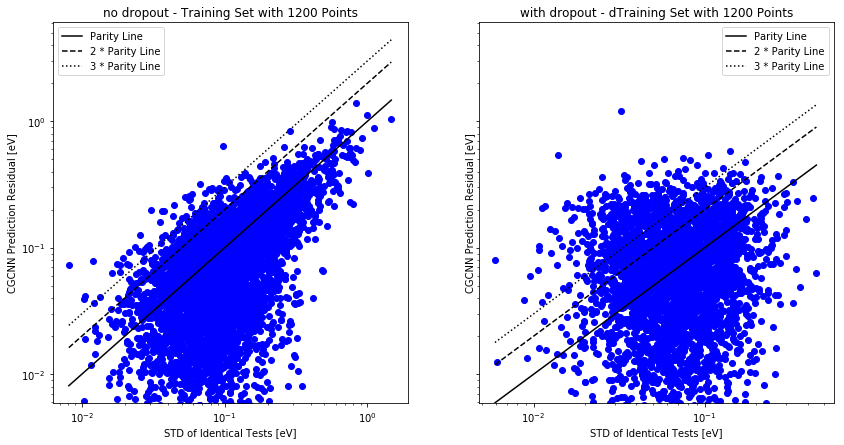

In [8]:
TrainingResid = np.abs(TrainingData.iloc[:, 0] - TrainingStats['mean'])
dTrainingResid = np.abs(dTrainingData.iloc[:, 0] - dTrainingStats['mean'])

# std = TrainingStats['std']
# dstd = dTrainingStats['std']

f, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(14, 7), sharey=True)
ax4a.scatter(TrainingStats['std'], TrainingResid, color='blue')
ax4a.plot([min(TrainingStats['std']), max(TrainingStats['std'])], 
         [min(TrainingStats['std']), max(TrainingStats['std'])], 'k', label='Parity Line')
ax4a.plot([min(TrainingStats['std']), max(TrainingStats['std'])], 
         [2 * min(TrainingStats['std']), 2 * max(TrainingStats['std'])], 'k--', label='2 * Parity Line')
ax4a.plot([min(TrainingStats['std']), max(TrainingStats['std'])], 
         [3 * min(TrainingStats['std']), 3 * max(TrainingStats['std'])], 'k:', label='3 * Parity Line')

ax4a.set_xlabel('STD of Identical Tests [eV]')
ax4a.set_ylabel('CGCNN Prediction Residual [eV]')
ax4a.set_xscale('log')
ax4a.set_yscale('log')
ax4a.set_title('no dropout - Training Set with 1200 Points')
ax4a.legend()


ax4b.scatter(dTrainingStats['std'], dTrainingResid, color='blue')
ax4b.plot([min(dTrainingStats['std']), max(dTrainingStats['std'])], 
         [min(dTrainingStats['std']), max(dTrainingStats['std'])], 'k', label='Parity Line')
ax4b.plot([min(dTrainingStats['std']), max(dTrainingStats['std'])], 
         [2 * min(dTrainingStats['std']), 2 * max(dTrainingStats['std'])], 'k--', label='2 * Parity Line')
ax4b.plot([min(dTrainingStats['std']), max(dTrainingStats['std'])], 
         [3 * min(dTrainingStats['std']), 3 * max(dTrainingStats['std'])], 'k:', label='3 * Parity Line')

ax4b.set_xlabel('STD of Identical Tests [eV]')
ax4b.set_ylabel('CGCNN Prediction Residual [eV]')
ax4b.set_xscale('log')
ax4b.set_yscale('log')
ax4b.set_title('with dropout - dTraining Set with 1200 Points')
ax4b.legend()

plt.show()